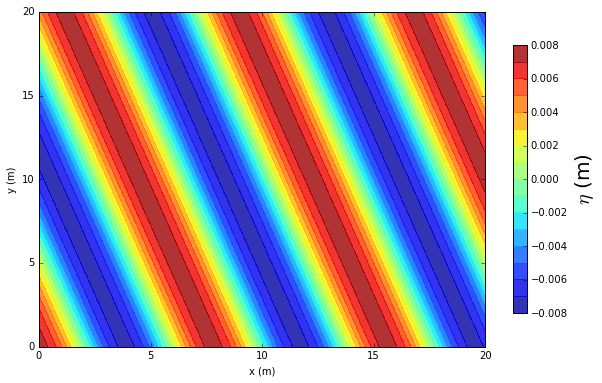

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
from proteus.WaveTools import MonochromaticWaves
import numpy as np

n=151
xi = np.linspace(0, 20, n)
yi = np.linspace(0, 20, n)

eta_t = np.zeros((n, n),)

period = 2.
waveHeight = 0.1
mwl = 0.
depth = 1.
g = np.array([0., 0., -9.81])
waveDir = np.array([1., 3., 0.])
wavelength = 7.42
waveType ="Fenton"

Ycoeff = [0.00622342,
         0.00003097,
         0.00000011,
         0.00000000]

Bcoeff = [0.00510811,
         0.00005433,
         0.00000055,
         0.00000001]

#http://johndfenton.com/Papers/Fenton88-The-numerical-solution-of-steady-water-wave-problems.pdf

meanVelocity = np.array([0., 0., 0.])
phi0 = 0.


MW = MonochromaticWaves(period,
                        waveHeight,
                        mwl,
                        depth,
                        g,
                        waveDir,
                        wavelength,
                        waveType,
                        Ycoeff,
                        Bcoeff,
                        meanVelocity,
                        phi0
                        )
                

for i in range(len(xi)):
    for j in range(len(yi)):
        x = [xi[i], yi[j], 0]
        eta_t[i,j] = MW.eta(x, 0.)
        
plt.figure(figsize=(10, 6), dpi=100)
X,Y = np.meshgrid(xi,yi)

CS = plt.contourf(X,Y,eta_t, 16, alpha=0.8)

plt.xlabel("x (m)", size=10)
plt.ylabel("y (m)", size=10)

CB = plt.colorbar(CS, shrink=0.8, extend='both')
CB.set_label("$\eta$ (m)", size = 20)

plt.show()

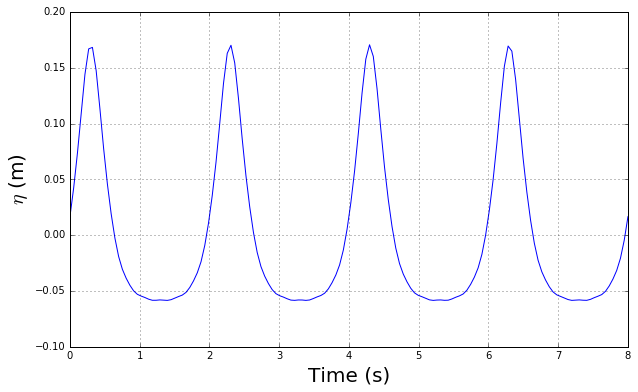

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
from proteus.WaveTools import MonochromaticWaves
import numpy as np

n=150

eta_t = np.zeros(n)

period = 2.
waveHeight = 0.2
mwl = 0.
depth = 0.5
g = np.array([0., 0., -9.81])
waveDir = np.array([1., 3., 0.])
wavelength = 7.42
waveType ="Fenton"

Ycoeff = [0.07592510,
         0.03816888,
         0.01671522,
         0.00723759,
         0.00326153,
         0.00158559,
         0.00090157,
         0.00071635]

Bcoeff = [0.10841101,
         0.02759413,
         0.00736204,
         0.00180796,
         0.00037182,
         0.00005074,
         -0.00000358,
         -0.00000400]

#http://johndfenton.com/Papers/Fenton88-The-numerical-solution-of-steady-water-wave-problems.pdf

meanVelocity = np.array([0., 0., 0.])
phi0 = 0.

MW = MonochromaticWaves(period,
                        waveHeight,
                        mwl,
                        depth,
                        g,
                        waveDir,
                        wavelength,
                        waveType,
                        Ycoeff,
                        Bcoeff,
                        meanVelocity,
                        phi0
                        )
                
tnlist=np.linspace(0, 4*period, n)

for i in range(len(tnlist)):
    x = [2., 0.5, 0.]
    t = tnlist[i]
    eta_t[i] = MW.eta(x, t)
    

plt.figure(figsize=(10,6), dpi=100)

plt.xlim(0., 4*period)
plt.plot(tnlist, eta_t)

plt.xlabel("Time (s)", size=20)
plt.ylabel("$\eta$ (m)", size=20)
plt.grid()
plt.show()
